# Analysis of longer time course data for finding the genes with longer lag

Data from spore to YES4: `/data/c/yangyusheng_optimized/DIT_HAP_pipeline/results/HD_DIT_HAP_generationPLUS1/17_gene_level_curve_fitting/Gene_level_statistics_fitted.tsv`

Data from spore to YES6: `/data/c/yangyusheng_optimized/DIT_HAP_pipeline/results/Spore2YES6_1328/17_gene_level_curve_fitting/Gene_level_statistics_fitted.tsv`

## 1. Import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("/data/c/yangyusheng_optimized/DIT_HAP_pipeline/config/DIT_HAP.mplstyle")
AX_WIDTH, AX_HEIGHT = plt.rcParams['figure.figsize']
COLORS = plt.rcParams['axes.prop_cycle'].by_key()['color']

## 2. Load data

In [2]:
Spore2YES4_data = pd.read_csv('/data/c/yangyusheng_optimized/DIT_HAP_pipeline/results/HD_DIT_HAP_generationPLUS1/17_gene_level_curve_fitting/gene_level_fitting_statistics.tsv', sep='\t')
Spore2YES6_data = pd.read_csv('/data/c/yangyusheng_optimized/DIT_HAP_pipeline/results/Spore2YES6_1328/17_gene_level_curve_fitting/gene_level_fitting_statistics.tsv', sep='\t')

common_columns = ["Systematic ID", "Name", "FYPOviability", "DeletionLibrary_essentiality"]

Spore2YES4_data.columns = [ c if c in common_columns else f"{c}_Spore2YES4" for c in Spore2YES4_data.columns]
Spore2YES6_data.columns = [ c if c in common_columns else f"{c}_Spore2YES6" for c in Spore2YES6_data.columns]

Spore2YES4_coverage = pd.read_csv('/data/c/yangyusheng_optimized/DIT_HAP_pipeline/reports/HD_DIT_HAP_generationPLUS1/insertion_density_analysis/insertion_density_analysis.tsv', sep='\t')
Spore2YES6_coverage = pd.read_csv('/data/c/yangyusheng_optimized/DIT_HAP_pipeline/reports/Spore2YES6_1328/insertion_density_analysis/insertion_density_analysis.tsv', sep='\t')

Spore2YES4_coverage.columns = [ c if c in common_columns else f"{c}_Spore2YES4" for c in Spore2YES4_coverage.columns]
Spore2YES6_coverage.columns = [ c if c in common_columns else f"{c}_Spore2YES6" for c in Spore2YES6_coverage.columns]

merged_data = pd.merge(Spore2YES4_data, Spore2YES6_data, on=common_columns, how='inner')
merged_coverage = pd.merge(Spore2YES4_coverage, Spore2YES6_coverage, on=common_columns[:2], how='inner')

# 3. Compare the data

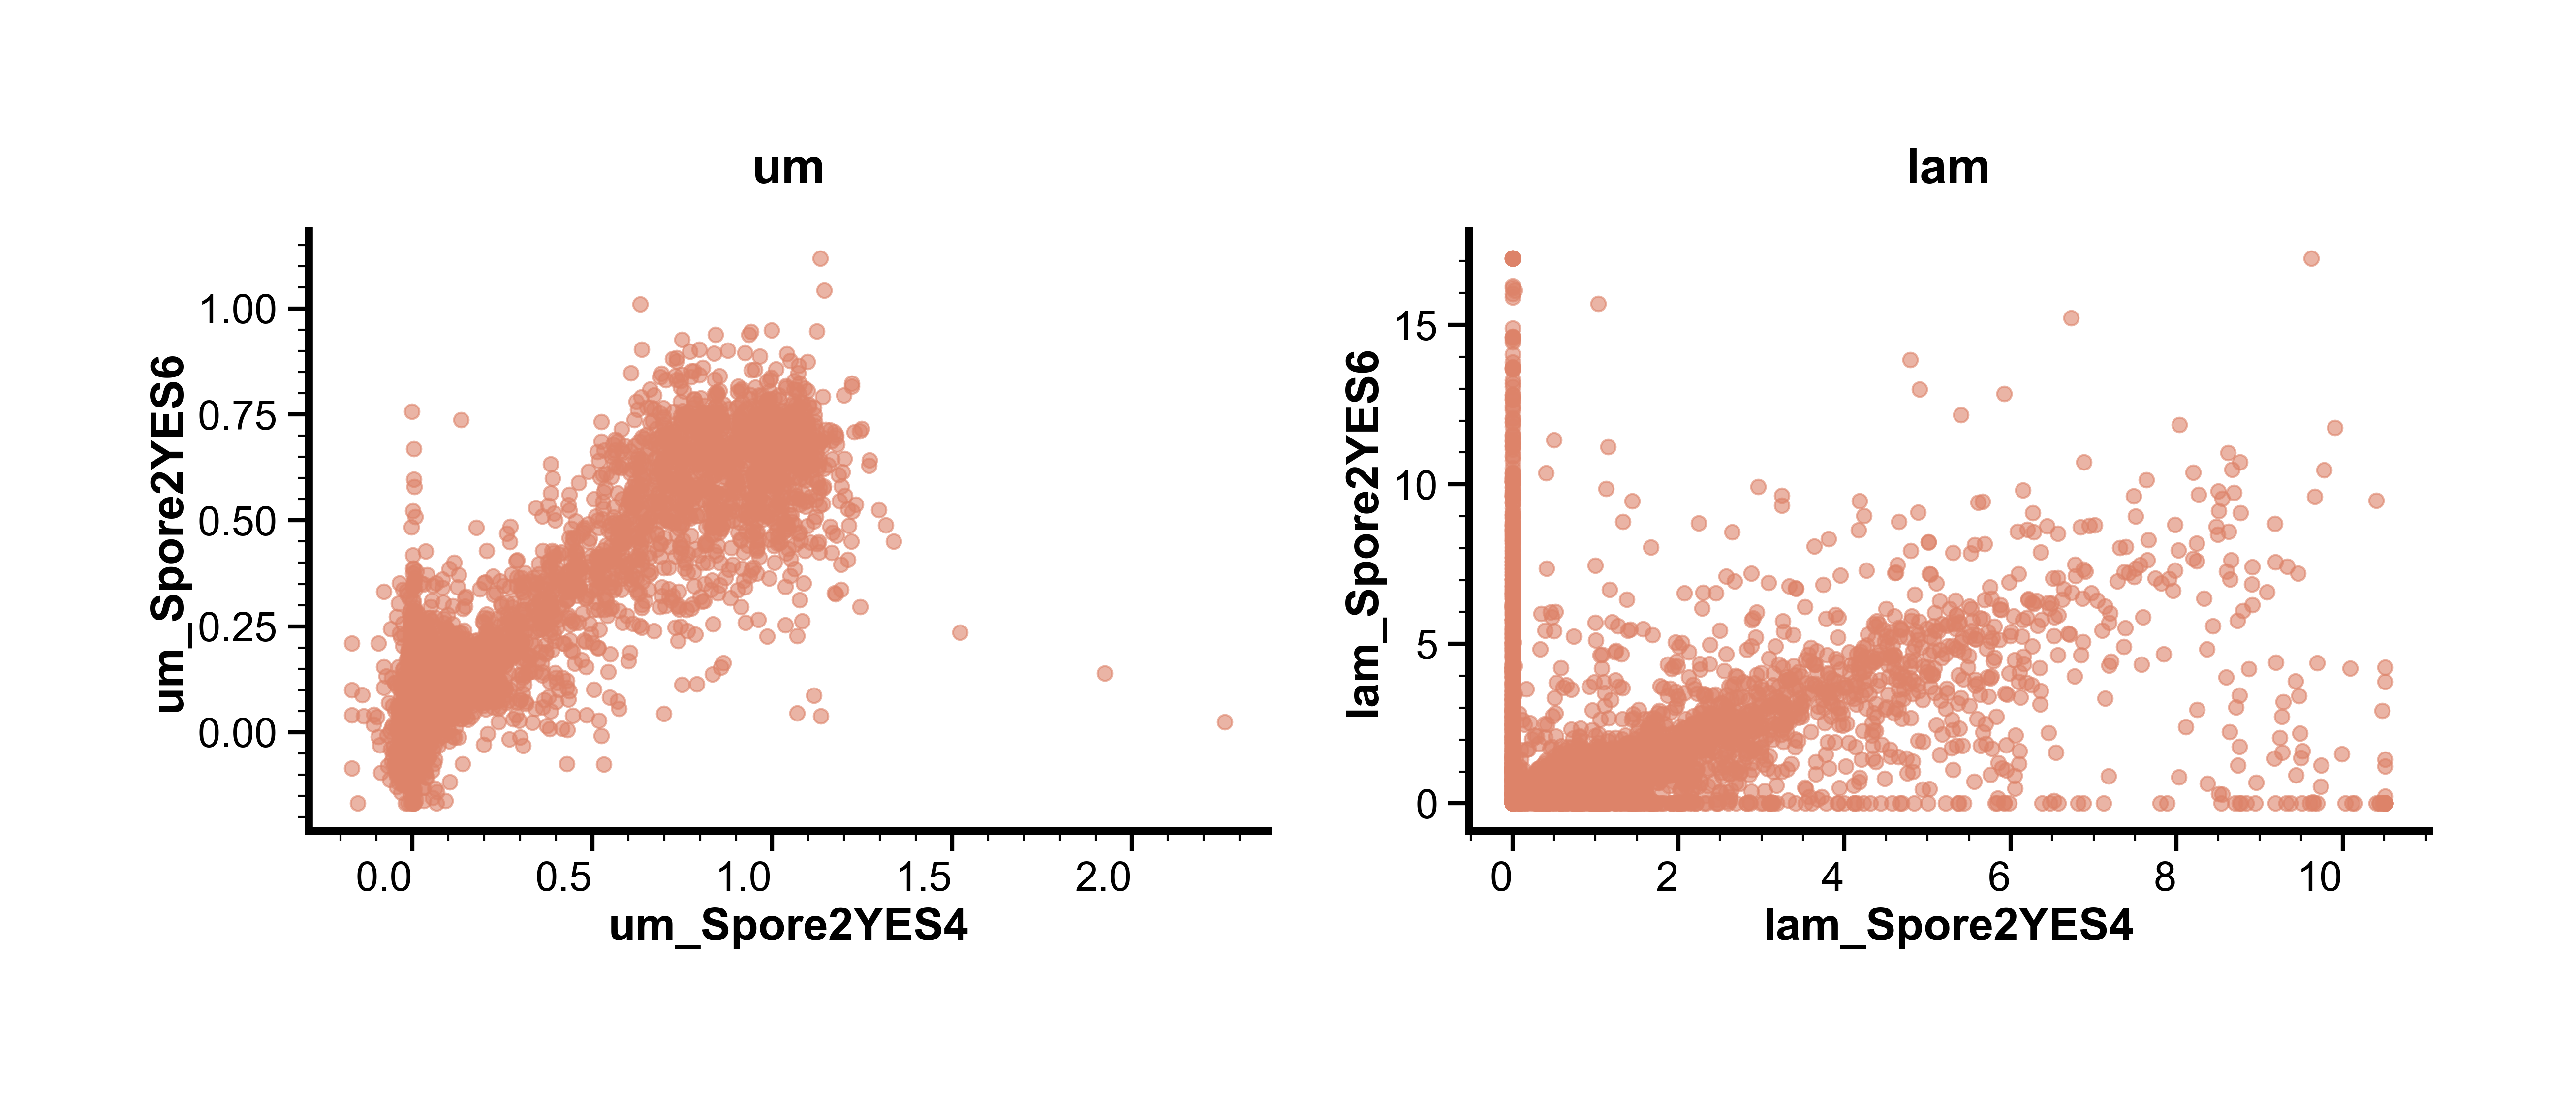

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(2*AX_WIDTH, AX_HEIGHT))

# compare the um
x = merged_data['um_Spore2YES4']
y = merged_data['um_Spore2YES6']

axes[0].scatter(x, y, alpha=0.6, s=50)
axes[0].set_xlabel('um_Spore2YES4')
axes[0].set_ylabel('um_Spore2YES6')
axes[0].set_title('um')

# compare the lam
x = merged_data['lam_Spore2YES4']
y = merged_data['lam_Spore2YES6']

axes[1].scatter(x, y, alpha=0.6, s=50)
axes[1].set_xlabel('lam_Spore2YES4')
axes[1].set_ylabel('lam_Spore2YES6')
axes[1].set_title('lam')

plt.show()
plt.close()

In [5]:
merged_data["delta_A"] = merged_data["A_Spore2YES6"] - merged_data["A_Spore2YES4"]
merged_data["delta_um"] = merged_data["um_Spore2YES6"] - merged_data["um_Spore2YES4"]
merged_data["delta_lam"] = merged_data["lam_Spore2YES6"] - merged_data["lam_Spore2YES4"]

In [6]:
high_insertion_density_genes = merged_coverage.query("total_insertions_Spore2YES6 >=4")

In [8]:
sig_different_genes = merged_data.query("delta_um > 0.3 and delta_lam > 3 and `Systematic ID` in @high_insertion_density_genes['Systematic ID']").sort_values(["FYPOviability"])#.filter(regex="^YES(?!.*fitted)(?!.*residual)")

In [9]:
sig_different_genes

,Systematic ID,Name,FYPOviability,DeletionLibrary_essentiality,time_points_Spore2YES4,Status_Spore2YES4,A_Spore2YES4,um_Spore2YES4,lam_Spore2YES4,t10_Spore2YES4,...,YES0_residual_Spore2YES6,YES1_residual_Spore2YES6,YES2_residual_Spore2YES6,YES3_residual_Spore2YES6,YES4_residual_Spore2YES6,YES5_residual_Spore2YES6,YES6_residual_Spore2YES6,delta_A,delta_um,delta_lam
27,SPAC1039.01,SPAC1039.01,viable,V,"0.0,3.352,6.588,10.104,13.48",Success,-0.023,0.004,-0.000,0.364,...,0.0,-0.388,-0.387,-0.068,-0.263,0.037,-0.015,2.077,0.340,14.629
165,SPAC12G12.16c,SPAC12G12.16c,viable,V,"0.0,3.352,6.588,10.104,13.48",Success,-0.040,0.002,0.000,1.006,...,0.0,0.065,0.013,0.212,0.003,-0.234,0.154,5.011,0.416,11.180
310,SPAC15A10.15,sgo2,viable,V,"0.0,3.352,6.588,10.104,13.48",Success,-0.067,0.006,0.000,0.676,...,0.0,0.560,-0.034,0.435,0.106,-0.014,0.002,3.525,0.573,17.084
573,SPAC19A8.01c,sec73,viable,V,"0.0,3.352,6.588,10.104,13.48",Success,0.021,-0.003,0.000,0.364,...,0.0,0.006,-0.049,0.357,-0.104,-0.272,0.037,2.867,0.487,17.090
1051,SPAC26F1.04c,etr1,viable,V,"0.0,3.352,6.588,10.104,13.48",Success,-0.063,0.004,0.000,1.006,...,0.0,-0.078,0.133,0.098,0.034,-0.057,0.029,5.902,0.593,13.274
1222,SPAC30D11.06c,hfl1,viable,V,"0.0,3.352,6.588,10.104,13.48",Success,-0.014,0.002,0.000,0.364,...,0.0,0.027,-0.066,0.489,-0.313,-0.151,0.020,2.048,0.339,17.090
1563,SPAC57A7.15c,pex22,viable,Not_determined,"0.0,3.352,6.588,10.104,13.48",Success,-0.073,0.004,-0.000,1.006,...,0.0,-0.147,0.152,-0.100,-0.055,0.154,-0.111,2.200,0.352,11.554
1593,SPAC5H10.13c,gmh2,viable,V,"0.0,3.352,6.588,10.104,13.48",Success,0.105,-0.017,-0.000,0.373,...,0.0,-0.575,-0.493,0.727,0.356,0.254,-1.864,1.884,0.350,5.412
1920,SPACUNK4.11c,mpp6,viable,V,"0.0,3.352,6.588,10.104,13.48",Success,-0.012,0.002,0.000,0.364,...,0.0,-0.149,0.176,0.415,0.256,-0.230,0.031,3.133,0.521,17.090
1987,SPAPB1A10.10c,ypt71,viable,V,"0.0,3.352,6.588,10.104,13.48",Success,-0.021,0.004,0.000,0.364,...,0.0,-0.036,0.625,0.117,-0.117,0.216,-0.145,2.091,0.343,12.082


In [10]:
print("\n".join(sig_different_genes["Name"]))

SPAC1039.01
SPAC12G12.16c
sgo2
sec73
etr1
hfl1
pex22
gmh2
mpp6
ypt71
plg7
ish1
SPBP4H10.07
nur1
